<a href="https://colab.research.google.com/github/damodhar92/Guvi-Tasks/blob/main/%20Task_6(Assignment5_6_7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [81]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [83]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [84]:
df.tail()

,Chirps/Second,Ground Temperature
10,15.0,79.6
11,17.2,82.6
12,16.0,80.6
13,17.0,83.5
14,14.4,76.3


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [86]:
df.shape

(15, 2)

In [87]:
X = df.drop('Chirps/Second', axis =1)
Y = df['Chirps/Second']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 5442)

In [102]:
LR = LinearRegression(fit_intercept=True, normalize=True)
LR.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [93]:
Y_pred = LR.predict(X_test)

In [95]:
  LR.score(X_train, Y_train)    

0.768293604813739

In [96]:
LR.score(X_test, Y_test)

0.34269584908450534

In [103]:
Lasso_reg = Lasso(alpha = 0.1, max_iter=1000, tol=0.001,)
Lasso_reg.fit(X_train, Y_train)

Lasso(alpha=0.1, tol=0.001)

In [106]:
Rid_reg = Ridge(alpha = 1.0, max_iter=1000, tol=0.001)
Rid_reg.fit(X_train, Y_train)
   

Ridge(max_iter=1000)

In [104]:
Lasso_reg.score(X_train, Y_train)

0.7682223938349843

In [105]:
Lasso_reg.score(X_test, Y_test)

0.3396320309218178

In [120]:
Lasso_reg = Lasso(alpha = 0.1, max_iter=1000, tol=0.001,)
Lasso_reg.fit(X_train, Y_train)

Lasso(alpha=0.1, tol=0.001)

In [107]:
Rid_reg.score(X_train,Y_train)

0.7682910249673727

In [108]:
Rid_reg.score(X_test,Y_test)

0.34211907315195655

In [109]:
extrapolation = {"Ground Temperature": [95,0], "Chirps/Second": [0,18]} 
df2 = pd.DataFrame(extrapolation)
df2

,Ground Temperature,Chirps/Second
0,95,0
1,0,18


In [110]:
X2 = df2.drop('Chirps/Second', axis = 1)
X2

,Ground Temperature
0,95
1,0


In [111]:
df2['Chirps/Second'] = LR.predict(X2)

In [112]:
df2

,Ground Temperature,Chirps/Second
0,95,19.821318
1,0,1.706098


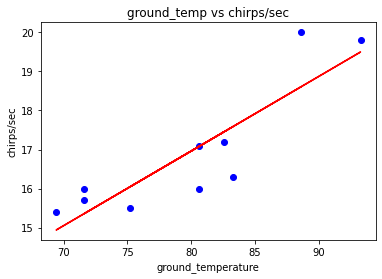

In [113]:
plt.scatter(X_train, Y_train,color='blue')
plt.plot(X_train, LR.predict(X_train), color= 'red')
plt.title('ground_temp vs chirps/sec')
plt.xlabel('ground_temperature')
plt.ylabel('chirps/sec')
plt.show()

In [114]:
X = df.drop('Ground Temperature', axis =1)
Y = df['Ground Temperature']

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 5442)
    

In [116]:
LR = LinearRegression(fit_intercept=True, normalize=False )
LR.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

In [117]:
Y_pred = LR.predict(X_test)

In [118]:
LR.score(X_train, Y_train)

0.7682936048137392

In [119]:
LR.score(X_test, Y_test)

0.17498205260340693

In [121]:
Lasso_reg.score(X_test, Y_test)

0.19144926759545233

In [122]:
Lasso_reg.score(X_train, Y_train)

0.7682223938349841

In [123]:
Rid_reg = Ridge(alpha = 1.0, max_iter=1000, tol=0.001)
Rid_reg.fit(X_train, Y_train)

Ridge(max_iter=1000)

In [124]:
Rid_reg.score(X_train, Y_train)

0.7672223172265926

In [125]:
Rid_reg.score(X_test, Y_test)

0.23684551398019427

In [126]:
Interpolation = {"Ground Temperature": [95,0], "Chirps/Second": [0,18]} 
df3 = pd.DataFrame(Interpolation)
df3

,Ground Temperature,Chirps/Second
0,95,0
1,0,18


In [127]:
X3 = df3.drop('Ground Temperature', axis = 1)
X3
     

,Chirps/Second
0,0
1,18


In [128]:

df3['Ground Temperature'] = Rid_reg.predict(X3)
df3

,Ground Temperature,Chirps/Second
0,14.130971,0
1,83.946505,18


b1. When Ground Temperature = 95 , Chirping Frequency = 19.821318 ** When Chirping Frequency = 18 , Ground Temperature = 83.946505** Equation of this Relation is: Y = mX + C

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [47]:
df = pd.read_fwf("brain_body (1).txt")

In [48]:
df.shape

(62, 2)

In [49]:
df.isnull()

,Brain,Body
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
57,False,False
58,False,False
59,False,False
60,False,False


In [50]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

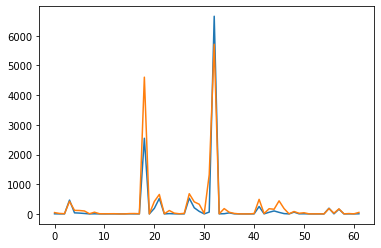

In [51]:
plt.plot(df)

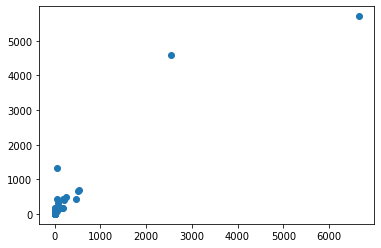

In [52]:
plt.scatter(df['Brain'],df['Body'])

In [53]:
df['logx']=np.log(df['Body'])
df['logy']=np.log(df['Brain'])

In [55]:
df.head()

,Brain,Body,logx,logy
0,3.385,44.5,3.795489,1.219354
1,0.480,15.5,2.740840,-0.733969
2,1.350,8.1,2.091864,0.300105
3,465.000,423.0,6.047372,6.142037
4,36.330,119.5,4.783316,3.592644


In [56]:
df.tail()

,Brain,Body,logx,logy
57,160.000,169.0,5.129899,5.075174
58,0.900,2.6,0.955511,-0.105361
59,1.620,11.4,2.433613,0.482426
60,0.104,2.5,0.916291,-2.263364
61,4.235,50.4,3.919991,1.443383


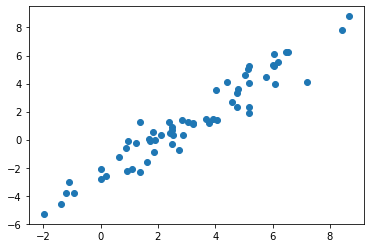

In [57]:
plt.scatter(df['logx'],df['logy'])

In [58]:
X=df.drop(['Brain','Body','logy'], axis=1)
y=df['logy']

In [62]:
from sklearn.preprocessing import RobustScaler

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 988)

In [64]:
sc = RobustScaler()
sc.fit_transform(X_train)
sc.fit(X_test)

RobustScaler()

In [66]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [67]:
y_pred = lr.predict(X_test)

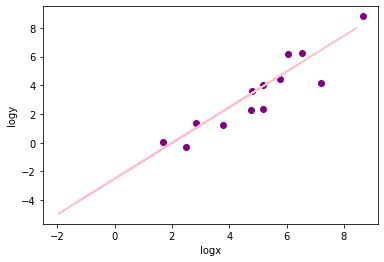

In [69]:
plt.scatter(X_test, y_test,color='purple')
plt.plot(X_train, lr.predict(X_train), color= 'pink')
plt.xlabel('logx')
plt.ylabel('logy')
plt.show()

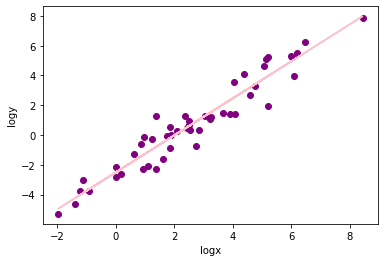

In [70]:
plt.scatter(X_train, y_train,color='purple')
plt.plot(X_train, lr.predict(X_train), color= 'pink')
plt.xlabel('logx')
plt.ylabel('logy')
plt.show()

In [72]:
from sklearn.metrics import accuracy_score
score = accuracy_score
lr.score(X_train,y_train)

0.9223831903465844

In [74]:
lr.score(X_test,y_test)

0.8401943830695706

In [76]:
print('R^2:',metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.8401943830695706
Adjusted R^2: 0.8256665997122589
MAE: 0.810223124089705
MSE: 1.0194455438110674
RMSE: 1.0096759598064458


In [80]:
y_pred = lr.predict(X_train)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9223831903465844
Adjusted R^2: 0.9207317688645968
MAE: 0.6719548119601693
MSE: 0.6984239286416258
RMSE: 0.8357176129779879


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [7]:
df = pd.read_fwf("salary (1).txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns 
%matplotlib inline
from sklearn import metrics

In [9]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [10]:
#As target variable has some dependence with each feature in x The following is the best possible combination of feature selection Score with training set is 85% and testing is 81



In [11]:
x=df.drop('Salary',axis=1)
y=df['Salary']
df.shape

(52, 6)

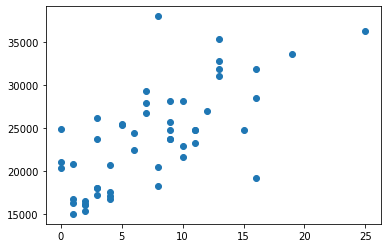

In [12]:
plt.scatter(df['Year'],df['Salary'])

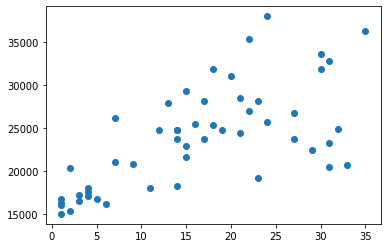

In [13]:
plt.scatter(df["YSdeg"],df["Salary"])

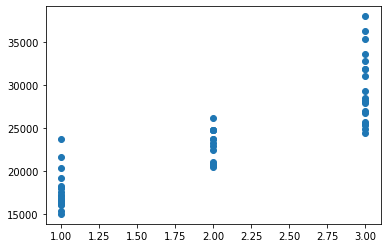

In [14]:
plt.scatter(df['Rank'],df["Salary"])

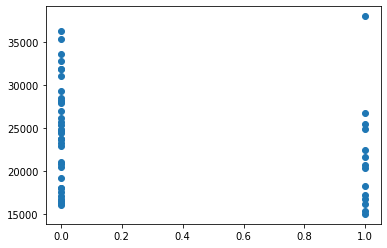

In [15]:
plt.scatter(df['Sex'],df['Salary'])

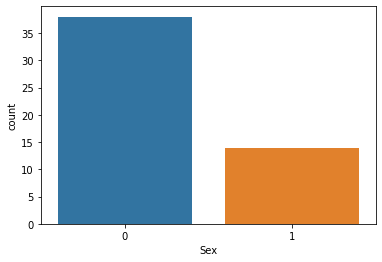

In [16]:
sns.countplot(x='Sex',data=df)

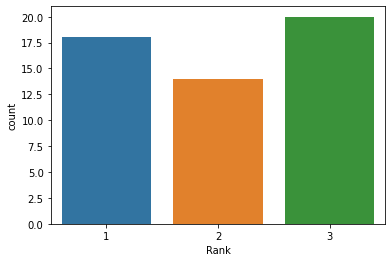

In [17]:
sns.countplot(x='Rank',data=df)

In [18]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [19]:
x=df.drop(['Salary','Sex','YSdeg'], axis=1)
y=df['Salary']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=445)

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(x_train)
print('training_score:' ,lr.score(x_train,y_train))
print('R^2:', metrics.r2_score(y_train,y_pred))

training_score: 0.8254882415243372
R^2: 0.8254882415243372


In [24]:
y_pred = lr.predict(x_test)
print('testing_score:', lr.score(x_test,y_test))
print('R^2:', metrics.r2_score(y_test,y_pred))

testing_score: 0.8702650244674759
R^2: 0.8702650244674759


In [25]:
Gender_df=df.groupby('Sex')

In [26]:
female_df=Gender_df.get_group(0)
female_df.shape

(38, 6)

In [29]:
male_df=Gender_df.get_group(1)
male_df.shape

(14, 6)

In [30]:
female_df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850
10,0,3,12,1,22,27025
11,0,2,15,1,19,24750


In [31]:
male_df

,Sex,Rank,Year,Degree,YSdeg,Salary
3,1,3,7,1,27,26775
6,1,3,0,0,32,24900
23,1,3,8,1,24,38045
27,1,3,5,1,16,25500
30,1,1,10,0,15,21600
33,1,2,4,0,33,20690
34,1,2,6,0,29,22450
36,1,1,8,1,14,18304
43,1,1,3,1,3,17250
46,1,1,2,1,6,16150


In [32]:
female_df.loc[0]

Sex           0
Rank          3
Year         25
Degree        1
YSdeg        35
Salary    36350
Name: 0, dtype: int64

In [33]:
male_df.loc[23]

Sex           1
Rank          3
Year          8
Degree        1
YSdeg        24
Salary    38045
Name: 23, dtype: int64

In [34]:
comparison_df_rank3=pd.DataFrame([female_df.loc[0],male_df.loc[23],female_df.loc[14],male_df.loc[27]])

In [35]:
comparison_df_rank3

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
23,1,3,8,1,24,38045
14,0,3,9,1,24,25748
27,1,3,5,1,16,25500


In [ ]:
#Above table Female Hightest salary is 36350 owns rank3 spending 25 years but
#male employes spent 8 years at that rank has a salary of 38045.
#other two observations point out clear discrimination towards women.

In [37]:
comparison_df_rank2 = pd.DataFrame([female_df.loc[31],female_df.loc[13],female_df.loc[11],
                                    female_df.loc[24],male_df.loc[33],male_df.loc[34]])

In [38]:
comparison_df_rank2

,Sex,Rank,Year,Degree,YSdeg,Salary
31,0,2,11,0,31,23300
13,0,2,9,0,27,23712
11,0,2,15,1,19,24750
24,0,2,9,1,12,24832
33,1,2,4,0,33,20690
34,1,2,6,0,29,22450


In [ ]:
#Rank2 shows equality in Salary to some extent.

In [39]:
comparison_df_rank1 = pd.DataFrame([female_df.loc[20],female_df.loc[32],female_df.loc[37],female_df.loc[38],
                                    male_df.loc[30],male_df.loc[36],male_df.loc[43],male_df.loc[46]])

In [ ]:
#Rank 1 Comparision

In [41]:
comparison_df_rank1_male_bias = pd.DataFrame([female_df.loc[20],male_df.loc[30]])

In [42]:
comparison_df_rank1_male_bias

,Sex,Rank,Year,Degree,YSdeg,Salary
20,0,1,16,0,23,19175
30,1,1,10,0,15,21600


In [43]:
comparison_df_rank1_Female_bias = pd.DataFrame([female_df.loc[32],male_df.loc[36]])

In [45]:
comparison_df_rank1_Female_bias

,Sex,Rank,Year,Degree,YSdeg,Salary
32,0,1,9,0,14,23713
36,1,1,8,1,14,18304


In [ ]:
#conclusion
#For Higher Ranked data is clearly biased towards male employees.